[(0.932785424692531, 0.7917163346707464), (0.06842056053632362, 0.19400259056154112), (0.3214489774419308, 0.3961558966411942)]
[(-0.4107992845170244, -0.17153786306862506), (-3.3473725481480616, -2.07176130831315), (-0.9408847030694295, -0.629446514958417)]


<module 'matplotlib.pyplot' from '/Users/michaelching/PycharmProjects/CECS 451/Assignment #5/venv/lib/python3.10/site-packages/matplotlib/pyplot.py'>

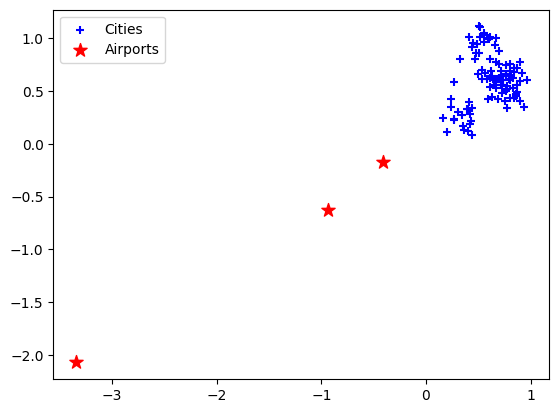

In [10]:
import random
import numpy as np

num_city = 100
num_air = 3
num_center = 5
sigma = 0.1
cities = set()
airports = []

for i in range(num_center):
    x = random.random()
    y = random.random()
    xc = np.random.normal(x, sigma, num_city//num_center)
    yc = np.random.normal(y, sigma, num_city//num_center)
    cities = cities.union(zip(xc, yc))


for i in range(num_air):
    x = random.random()
    y = random.random()
    airports.append((x,y))


#print (cities)
print (airports)

#Implement gradient
for i in range(num_air):

    airportX = airports[i][0]
    airportY = airports[i][1]

    x = 0
    y = 0

    for city in cities:
        x = x + (airportX - city[0])**2
        y = y + (airportY - city[1])**2


    x = airports[i][0] - (sigma * x)
    y = airports[i][1] - (sigma * y)
    airports[i] = (x,y)



print (airports)

import matplotlib.pyplot as plt

zip_cities = zip(*cities)
plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
zip_airs = zip(*airports)
plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')
plt.legend()
plt